In [190]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

#Create SQLAlchemy engine to connect to SQLite database
engine = create_engine("sqlite:///open_university_small.sqlite")

In [191]:
#Query to select data from 'studentInfo' table
query = "SELECT * FROM studentInfo"
query1 = "SELECT * FROM studentRegistration"

#Read data from 'studentInfo' table in dataframe
df = pd.read_sql_query(query, engine)
df_reg = pd.read_sql_query(query1, engine)

#Close SQLAlchemy engine
engine.dispose()

In [192]:
#Display registration dataframe
df_reg.head()

,index,code_module,code_presentation,id_student,date_registration,date_unregistration
0,0,AAA,2013J,11391,-159.0,NaN
1,1,AAA,2013J,28400,-53.0,NaN
2,2,AAA,2013J,30268,-92.0,12.0
3,3,AAA,2013J,31604,-52.0,NaN
4,4,AAA,2013J,32885,-176.0,NaN


In [193]:
#dataframe info
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                32593 non-null  int64  
 1   code_module          32593 non-null  object 
 2   code_presentation    32593 non-null  object 
 3   id_student           32593 non-null  int64  
 4   date_registration    32548 non-null  float64
 5   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [194]:
#number of rows in each column
df_reg.count()

index                  32593
code_module            32593
code_presentation      32593
id_student             32593
date_registration      32548
date_unregistration    10072
dtype: int64

<Axes: >

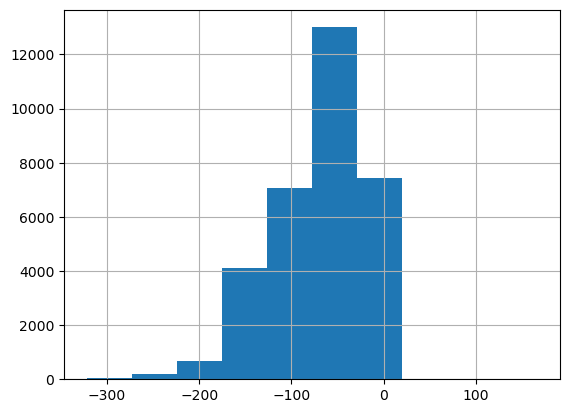

In [195]:
#histrogram of registration date
df_reg['date_registration'].hist()


In [196]:
#describe date_registration column
df_reg['date_registration'].describe()

count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

<Axes: >

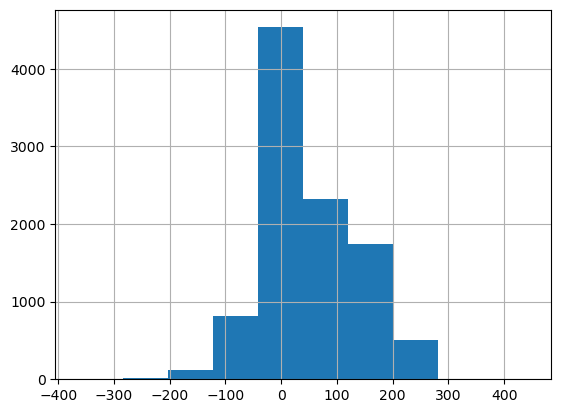

In [197]:
#histogram of date_unregistration
df_reg['date_unregistration'].hist()

In [198]:
#merge df and df_reg on 'id_student' column
merge_df = pd.merge(df, df_reg, on='id_student')
merge_df.head()

,index_x,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,index_y,code_module_y,code_presentation_y,date_registration,date_unregistration
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,AAA,2013J,-159.0,NaN
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1,AAA,2013J,-53.0,NaN
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2,AAA,2013J,-92.0,12.0
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,3,AAA,2013J,-52.0,NaN
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,4,AAA,2013J,-176.0,NaN


In [199]:
#Display dataframe
df.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [200]:
#create new dataframe with relevant columns
demo_df = merge_df[['date_registration','code_module_x', 'region', 'highest_education', 'imd_band', 'age_band', 'gender', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']]
demo_df.head()

,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,-159.0,AAA,East Anglian Region,HE Qualification,90-100%,55<=,M,0,240,N,Pass
1,-53.0,AAA,Scotland,HE Qualification,20-30%,35-55,F,0,60,N,Pass
2,-92.0,AAA,North Western Region,A Level or Equivalent,30-40%,35-55,F,0,60,Y,Withdrawn
3,-52.0,AAA,South East Region,A Level or Equivalent,50-60%,35-55,F,0,60,N,Pass
4,-176.0,AAA,West Midlands Region,Lower Than A Level,50-60%,0-35,F,0,60,N,Pass


In [201]:
#dataframe info
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40801 entries, 0 to 40800
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_registration     40737 non-null  float64
 1   code_module_x         40801 non-null  object 
 2   region                40801 non-null  object 
 3   highest_education     40801 non-null  object 
 4   imd_band              39400 non-null  object 
 5   age_band              40801 non-null  object 
 6   gender                40801 non-null  object 
 7   num_of_prev_attempts  40801 non-null  int64  
 8   studied_credits       40801 non-null  int64  
 9   disability            40801 non-null  object 
 10  final_result          40801 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.7+ MB


In [202]:
#number of rows in each column
demo_df.count()

date_registration       40737
code_module_x           40801
region                  40801
highest_education       40801
imd_band                39400
age_band                40801
gender                  40801
num_of_prev_attempts    40801
studied_credits         40801
disability              40801
final_result            40801
dtype: int64

In [203]:
#number of null values in each column
demo_df.isnull().sum()

date_registration         64
code_module_x              0
region                     0
highest_education          0
imd_band                1401
age_band                   0
gender                     0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [204]:
#unique values in each column
demo_df.nunique()

date_registration       332
code_module_x             7
region                   13
highest_education         5
imd_band                 10
age_band                  3
gender                    2
num_of_prev_attempts      7
studied_credits          61
disability                2
final_result              4
dtype: int64

In [205]:
#values in each column
col_list = ['region', 'highest_education', 'imd_band', 'gender', 'num_of_prev_attempts', 'studied_credits', 'age_band', 'disability', 'final_result']
for i in col_list:
    print(demo_df[i].unique())

['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']
['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']
['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' None '60-70%'
 '40-50%' '10-20' '0-10%']
['M' 'F']
[0 1 2 4 3 5 6]
[240  60 120  90 150 180 345 210 420 170  80  75 300 330 270 360 135  70
 225 585 325 130 195 105  30 655 165 100 400 390 220 160 250  45  40 235
 145  85 630 115 140 355  50 110  55 190 480 280 175  95 155 315 200 540
 310 370 205 215 255  65 430]
['55<=' '35-55' '0-35']
['N' 'Y']
['Pass' 'Withdrawn' 'Fail' 'Distinction']


In [206]:
#remove rows with null values
demo_df.dropna()
demo_df.isnull().sum()

date_registration         64
code_module_x              0
region                     0
highest_education          0
imd_band                1401
age_band                   0
gender                     0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [207]:
#remove rows with null values
demo_df = demo_df.dropna()

In [208]:
#convert final_result to numerical data. 1 = Distinction or Pass, 0 = Fail or Withdrawn
demo_df_n=demo_df.replace(['Pass', 'Withdrawn', 'Fail', 'Distinction'], [1, 0, 0, 1])
demo_df_n.head()

,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,-159.0,AAA,East Anglian Region,HE Qualification,90-100%,55<=,M,0,240,N,1
1,-53.0,AAA,Scotland,HE Qualification,20-30%,35-55,F,0,60,N,1
2,-92.0,AAA,North Western Region,A Level or Equivalent,30-40%,35-55,F,0,60,Y,0
3,-52.0,AAA,South East Region,A Level or Equivalent,50-60%,35-55,F,0,60,N,1
4,-176.0,AAA,West Midlands Region,Lower Than A Level,50-60%,0-35,F,0,60,N,1


In [209]:
#replace 10-20 in 'imd_band' to 10-20%
demo_df_n['imd_band'] = demo_df_n['imd_band'].replace('10-20', '10-20%')
#check if the change has been made
demo_df_n['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
       '60-70%', '40-50%', '10-20%', '0-10%'], dtype=object)

In [210]:
#look at studied_credits value counts for binning
studied_credits_counts = demo_df_n['studied_credits'].value_counts()
studied_credits_counts

60     19476
120     7791
90      4364
30      4163
180     1113
150     1112
240      330
210      237
75       132
70        98
270       67
135       47
130       47
45        41
300       39
100       38
80        27
40        22
160       16
105       15
110       14
330       13
195       13
220       10
190        9
165        9
140        7
145        7
50         7
170        7
360        7
115        6
250        4
85         4
55         4
95         3
200        3
280        3
225        3
400        3
255        2
205        2
310        2
390        2
235        2
345        2
355        1
630        1
175        1
655        1
155        1
325        1
540        1
585        1
370        1
420        1
215        1
65         1
430        1
Name: studied_credits, dtype: int64

In [211]:
#choose cutoff value and create list of studied_credits to be replaced
replace_studied_credits = list(studied_credits_counts[studied_credits_counts < 700].index)

#replace studied_credits values with 'Other'
for x in replace_studied_credits:
    demo_df_n['studied_credits'] = demo_df_n['studied_credits'].replace(x, 'Other')

#check if the change has been made
demo_df_n['studied_credits'].value_counts()

60       19476
120       7791
90        4364
30        4163
Other     1317
180       1113
150       1112
Name: studied_credits, dtype: int64

In [212]:
#check row count of the dataframe
demo_df_n.count()


date_registration       39336
code_module_x           39336
region                  39336
highest_education       39336
imd_band                39336
age_band                39336
gender                  39336
num_of_prev_attempts    39336
studied_credits         39336
disability              39336
final_result            39336
dtype: int64

In [213]:
#check final dataframe
demo_df_n.head()

,date_registration,code_module_x,region,highest_education,imd_band,age_band,gender,num_of_prev_attempts,studied_credits,disability,final_result
0,-159.0,AAA,East Anglian Region,HE Qualification,90-100%,55<=,M,0,Other,N,1
1,-53.0,AAA,Scotland,HE Qualification,20-30%,35-55,F,0,60,N,1
2,-92.0,AAA,North Western Region,A Level or Equivalent,30-40%,35-55,F,0,60,Y,0
3,-52.0,AAA,South East Region,A Level or Equivalent,50-60%,35-55,F,0,60,N,1
4,-176.0,AAA,West Midlands Region,Lower Than A Level,50-60%,0-35,F,0,60,N,1


MODELS

In [214]:
#Import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


logistic regression

In [215]:
# Split the data into X (feature) and y (target)
y = demo_df_n['final_result']
X = demo_df_n.drop(columns=['final_result'])

#Encode the categorical data 
X = pd.get_dummies(X)

# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9, max_iter=1000, solver='newton-cg')

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

#Generate training predictions
training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print('training_matrix:')
print(training_matrix)

# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print('test_matrix:')
print(test_matrix)

# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print('training_report:')
print(training_report)

# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print('testing_report:')
print(testing_report)

training_matrix:
[[12214  4261]
 [ 6466  6561]]
test_matrix:
[[4044 1405]
 [2237 2148]]
training_report:
              precision    recall  f1-score   support

           0       0.65      0.74      0.69     16475
           1       0.61      0.50      0.55     13027

    accuracy                           0.64     29502
   macro avg       0.63      0.62      0.62     29502
weighted avg       0.63      0.64      0.63     29502

testing_report:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      5449
           1       0.60      0.49      0.54      4385

    accuracy                           0.63      9834
   macro avg       0.62      0.62      0.62      9834
weighted avg       0.63      0.63      0.62      9834



decision tree

In [216]:
# Load data
y = demo_df_n['final_result']
X = demo_df_n.drop(['final_result'], axis=1)

#Encode the categorical data 
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')

Accuracy of the Decision Tree model: 0.61


random forest

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4052,1453
Actual 1,1847,2482


Accuracy Score : 0.6644295302013423
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      5505
           1       0.63      0.57      0.60      4329

    accuracy                           0.66      9834
   macro avg       0.66      0.65      0.66      9834
weighted avg       0.66      0.66      0.66      9834



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

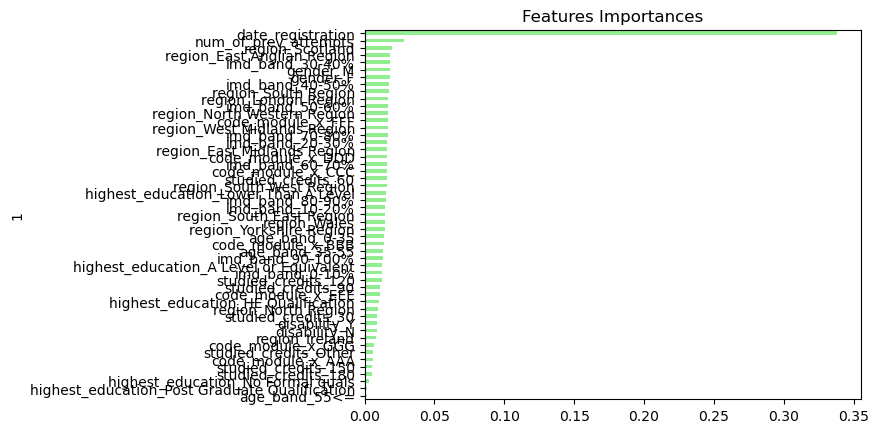

In [217]:
# Define features set
X = demo_df_n.copy()
X.drop("final_result", axis=1, inplace=True)

#Encode the categorical data 
X = pd.get_dummies(X)

 # Define target vector
y = demo_df_n["final_result"].ravel()

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

 # Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

neutral network

In [225]:
# Convert categorical data to numeric with `pd.get_dummies`
category_convert = pd.get_dummies(demo_df_n)

# Split our preprocessed data into our features and target arrays
y = category_convert["final_result"].values
X = category_convert.drop(["final_result"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#Function to create model
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=X_train_scaled.shape[1]))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn


/var/folders/t4/k2tbzzpn1hsdycb190cq1m5w0000gn/T/ipykernel_39929/3738965723.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = category_convert.drop(["final_result"],1).values


In [226]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

Reloading Tuner from ./untitled_project/tuner0.json


{'activation': 'tanh',
 'first_units': 5,
 'num_layers': 6,
 'units_0': 9,
 'units_1': 5,
 'units_2': 9,
 'units_3': 5,
 'units_4': 1,
 'units_5': 5,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [227]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/Users/patricbeaven/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/patricbeaven/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 1 objects could not be loaded. Example error message for object <Dense name=dense, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(51, 5), Received: value.shape=(50, 5). Target variable: <KerasVariable shape=(51, 5), dtype=float32, path=sequential/dense/kernel>

List of objects that could not be loaded:
[<Dense name=dense, built=True>]

Decision tree XGBoost

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Load data
y = demo_df_n['final_result']
X = demo_df_n.drop(['final_result'], axis=1)

#Encode the categorical data 
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Varying max_depth for example
depths = range(1, 11)  
accuracies = []

for depth in depths:
    model = xgb.XGBClassifier(max_depth=depth, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(depths)  
plt.show()


ValueError: feature_names must be string, and may not contain [, ] or <